<h1>Comprensión de imagenes con proyección bilateral</h1>

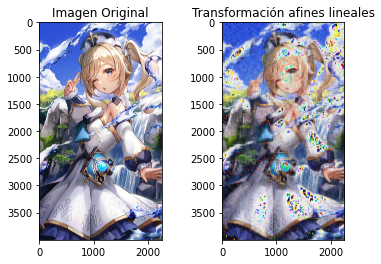

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


def proyeccion_bilateral(A, r, p, n):
    """
    Esta funcion Calcula la proyeccion biltateral de una imagen
    Sintaxis: proyeccion_bilateral(A, r, p, n)
    Entrada:
        A -> Matriz de una imagen
        r -> Rango
        p -> Cantidad de iteraciones
    Salida:
        Matriz de la imagen de entrada comprimida
    """
    Y2 = np.random.randn(n, r)
    for k in range(p):
        Y1 = A @ Y2
        Y2 = np.transpose(A) @ Y1
    Q, r_value = np.linalg.qr(Y2)
    Q = Q[:, 0:r]
    B = A @ Q
    C = np.transpose(Q)
    A = B @ C
    return A, B, C


def comprension_bilateral(I_color):
    """
    Esta funcion comprime una imagen usando proyección bilateral
    Sintaxis: comprension_bilateral(I_color)
    Entrada:
        I_color -> Matriz de una imagen
    Salida:
        Matriz de la imagen de entrada comprimida
    """
    m, n, c = np.shape(I_color)
    Ar = I_color[:, :, 0]
    Ag = I_color[:, :, 1]
    Ab = I_color[:, :, 2]

    r = 50
    p = 5

    Arr, Brr, Crr = proyeccion_bilateral(Ar, r, p, n)
    Agr, Bgr, Cgr = proyeccion_bilateral(Ag, r, p, n)
    Abr, Bbr, Cbr = proyeccion_bilateral(Ab, r, p, n)

    A_final = np.dstack((Arr, Agr, Abr))
    return A_final


I_color = cv2.imread('../Imagenes/Barbara.png')
A_final = comprension_bilateral(I_color)
cv2.imwrite("Barbara_comprimida.png", A_final)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(cv2.cvtColor(I_color, cv2.COLOR_BGR2RGB))
ax1.set_title('Imagen Original')

ax2.imshow(cv2.cvtColor(np.uint8(A_final), cv2.COLOR_BGR2RGB))
ax2.set_title('Transformación afines lineales')
plt.show()